In [13]:
%load_ext cython

In [150]:
%%cython

import numpy as np
from mpire import WorkerPool

cdef float epsilon, delta, LB, UB, mu, sig
cdef short n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
pi= np.pi

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    d_n = delta/n**2 * 6/pi**2
    return sig * np.sqrt(2*np.log(3/d_n)/n) + 3*np.log(3/d_n)/n

def EBLR(symulation, p1, p2, delta = 0.05, epsilon = 0.01):
    LB = 0
    UB = 1
    t = 0
    n = 1
    sumx=0
    sumx2=0
    while UB - LB > 2*epsilon:
        # Xt = np.random.choice([1, 0],p=[0.01,0.99])
        Xt= symulation(p1, p2)
        t+=1
        sumx += Xt
        sumx2 +=Xt**2
        mu = sumx/(t)
        sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        n+=1
    return mu

In [694]:
%%cython

import numpy as np
from mpire import WorkerPool
import scipy as sci



pool = WorkerPool(n_jobs=4)
cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
pi= np.pi

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    d_n = delta/n**2 * 6/pi**2
    return sig * np.sqrt(2*np.log(3/d_n)/n) + 3*np.log(3/d_n)/n

def EBLR_test(p, delta = 0.05, epsilon = 0.01):
    np.random.seed()
    LB = 0
    UB = 1
    t = 0
    X_t = []
    n = 1
    sumx=0
    sumx2=0
    while UB - LB > 2*epsilon:
        Xt = np.random.choice([1, 0],p=[p, 1-p])
        t+=1
        sumx += Xt
        sumx2 +=Xt**2
        mu = sumx/(t)
        sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        n+=1
    return mu, n

ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
x1 = np.array([pool.map(EBLR_test, [p]*100) for p in ps1])

# ps2 = np.arange(0, 0.5+0.05, 0.05)
# x2 = np.array([pool.map(EBLR_test, [p]*100) for p in ps2])

In [697]:
symulation_p = x1[:, :, 0]
symulation_n = x2[:, :, 1]

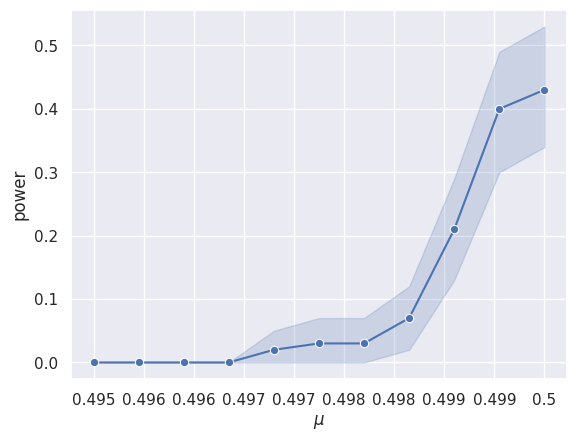

In [698]:
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

LEBR_df = pd.DataFrame((symulation_p>0.5).T.astype(int))
LEBR_df.columns = ps1
LEBR_df = pd.melt(LEBR_df)
sns.lineplot(data=LEBR_df, x="variable", y="value", marker="o")
xs = np.linspace(min(ps1),max(ps1),10)
plt.xticks(xs,np.round(xs, 3))
plt.ylabel("power")
plt.xlabel("$\mu$")
plt.show()

# from mpire import WorkerPool

# pool = WorkerPool(n_jobs=5)

# sns.set()

# ps = np.arange(0.48, 0.5, 0.001)
# print(ps)
# x = np.array([pool.map(EBLR_test, [p]*100) for p in ps])


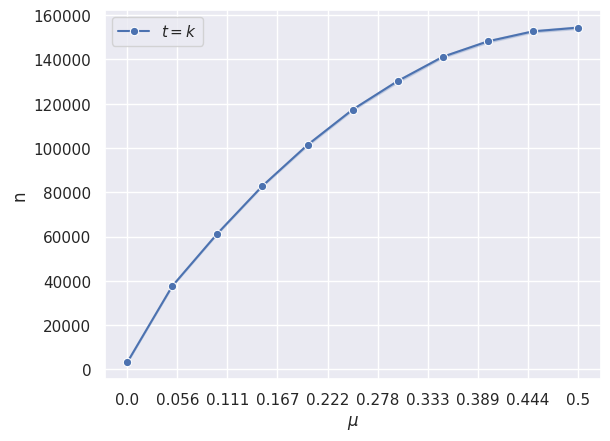

In [690]:
sns.set(style="darkgrid")

LEBR_n_df = pd.DataFrame(symulation_n.T)
LEBR_n_df.columns = ps2
# LEBR_n_df = pd.melt(LEBR_df)
LEBR_n_df = pd.melt(LEBR_n_df)

# sns.boxplot(data=LEBR_n_df, x="variable", y="value", color= "black", medianprops={"color": "red"})
sns.lineplot(data=LEBR_n_df, x="variable", y="value", marker= 'o')
xs = np.linspace(min(ps2),max(ps2),10)
plt.xticks(xs,np.round(xs, 3))
# xs = np.linspace(min(ps2),max(ps2),len(ps))
# plt.xticks(range(len(ps)), np.round(xs, 3))

plt.ylabel("n")
plt.xlabel("$\mu$")
plt.legend(["$t=k$"])
# plt.xticks(range(len(ps)),(np.linspace(min(ps2),max(ps2),len(ps)))

# df1 = LEBR_df.assign(type = 1)
# df2 = (LEBR_df+0.01).assign(type = 2)
# df = pd.concat([df1,df2])
# df = pd.melt(LEBR_df, id_vars="type")

# sns.boxplot(data = df, x="variable", y="value",hue="type")
plt.show()

In [643]:
ps2

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])